In [2]:
import pandas as pd
import numpy as np


In [4]:
import os
print(os.getcwd())


/Users/andrii/Documents/londons_fashionable_finds/03_Feature_Engineering


In [6]:
os.chdir('/Users/andrii/Documents/londons_fashionable_finds')


In [9]:
vintage_shops = pd.read_csv('02_Data_preprocessing/merged_vintage_shops_data.csv')

,name,address,latitude,longitude,rating,borough,shop_id,Unnamed: 0,Code,Area,Value,Code_earnings,Area_earnings,Pay_2021
0,Vintage80scasuals,"Unit 63, 105 Culvert Rd, London",51.470904,-0.156681,0.0,Wandsworth,0,3856.0,E09000032,Wandsworth,"640,000",00BJ,Wandsworth,746.7
1,Accessories of Old,"Next to Safestore, Arch 10 Munster Rd, London",51.472579,-0.203859,0.0,Hammersmith and Fulham,1,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
2,Eclectica (Clapham),"803 Wandsworth Rd, London",51.466581,-0.148460,4.9,Lambeth,2,3846.0,E09000022,Lambeth,"510,000",00AY,Lambeth,673.6
3,BajaboutiqueGB,"37 Elbe St, London",51.472878,-0.185076,0.0,Hammersmith and Fulham,3,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
4,INSIGHT Fulham Dress Agency,"201 Munster Rd, London",51.479447,-0.211883,5.0,Hammersmith and Fulham,4,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5


In [11]:
from IPython.display import display

display(vintage_shops)

,name,address,latitude,longitude,rating,borough,shop_id,Unnamed: 0,Code,Area,Value,Code_earnings,Area_earnings,Pay_2021
0,Vintage80scasuals,"Unit 63, 105 Culvert Rd, London",51.470904,-0.156681,0.0,Wandsworth,0,3856.0,E09000032,Wandsworth,"640,000",00BJ,Wandsworth,746.7
1,Accessories of Old,"Next to Safestore, Arch 10 Munster Rd, London",51.472579,-0.203859,0.0,Hammersmith and Fulham,1,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
2,Eclectica (Clapham),"803 Wandsworth Rd, London",51.466581,-0.148460,4.9,Lambeth,2,3846.0,E09000022,Lambeth,"510,000",00AY,Lambeth,673.6
3,BajaboutiqueGB,"37 Elbe St, London",51.472878,-0.185076,0.0,Hammersmith and Fulham,3,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
4,INSIGHT Fulham Dress Agency,"201 Munster Rd, London",51.479447,-0.211883,5.0,Hammersmith and Fulham,4,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,The Salvation Army (Clapton),"122 Lower Clapton Rd, London",51.554421,-0.053815,4.9,Hackney,2470,3836.0,E09000012,Hackney,"530,000",00AM,Hackney,575.1
2472,Age UK,"36/44 High St, London",51.581862,-0.031678,4.0,Waltham Forest,2471,3855.0,E09000031,Waltham Forest,"430,000",00BH,Waltham Forest,624.7
2473,Charity Hub,"654 Kingsland Rd, London",51.546140,-0.075496,0.0,Hackney,2472,3836.0,E09000012,Hackney,"530,000",00AM,Hackney,575.1
2474,The Salvation Army (Dalston),"Richmond Rd, London",51.543003,-0.074395,5.0,Hackney,2473,3836.0,E09000012,Hackney,"530,000",00AM,Hackney,575.1


In [12]:
vintage_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2476 non-null   object 
 1   address        2476 non-null   object 
 2   latitude       2476 non-null   float64
 3   longitude      2476 non-null   float64
 4   rating         2476 non-null   float64
 5   borough        2474 non-null   object 
 6   shop_id        2476 non-null   int64  
 7   Unnamed: 0     2474 non-null   float64
 8   Code           2474 non-null   object 
 9   Area           2474 non-null   object 
 10  Value          2474 non-null   object 
 11  Code_earnings  2474 non-null   object 
 12  Area_earnings  2474 non-null   object 
 13  Pay_2021       2474 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 270.9+ KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


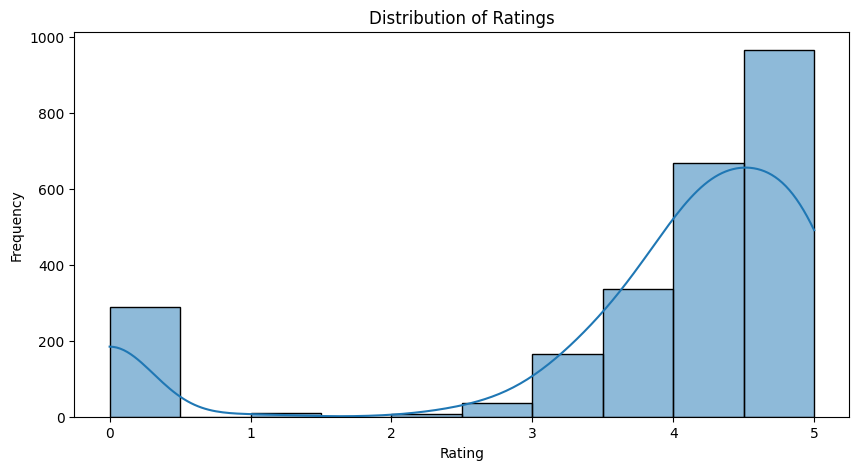

In [14]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(data=vintage_shops, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


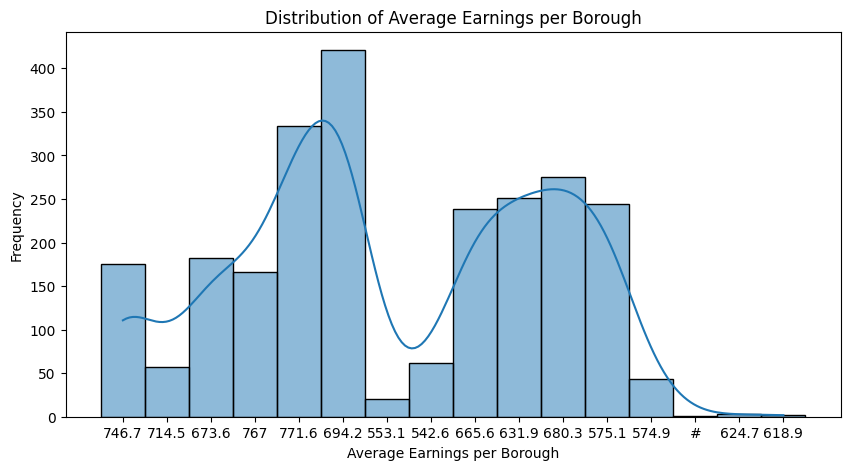

In [15]:
# Distribution of average earnings per borough
plt.figure(figsize=(10, 5))
sns.histplot(data=vintage_shops, x='Pay_2021', bins=10, kde=True)
plt.title('Distribution of Average Earnings per Borough')
plt.xlabel('Average Earnings per Borough')
plt.ylabel('Frequency')
plt.show()


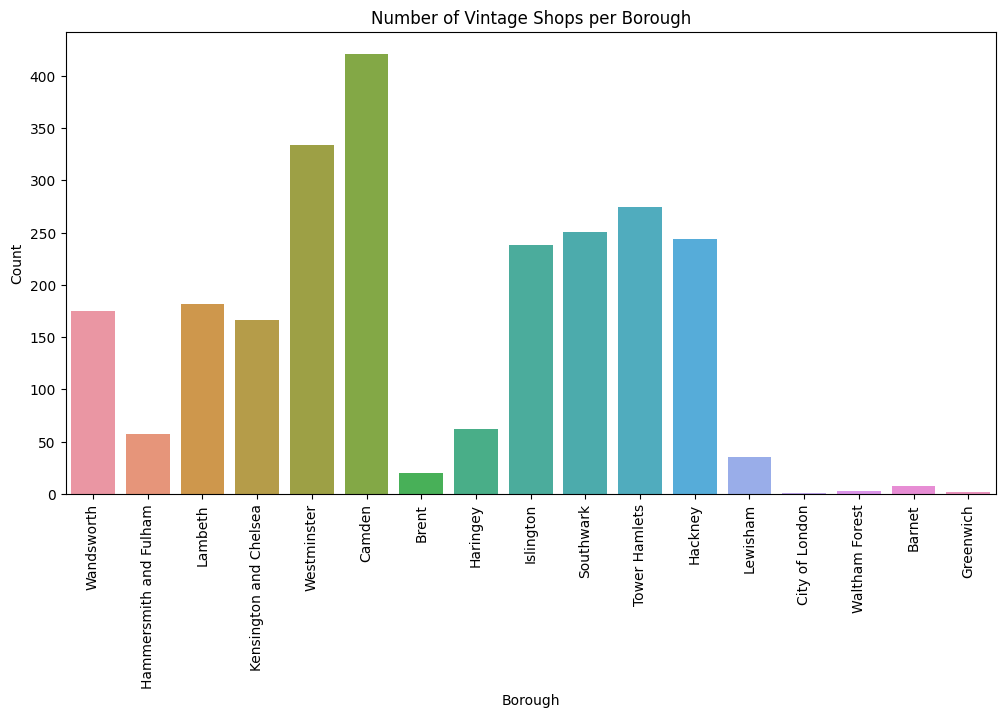

In [16]:
# Number of vintage shops per borough:
plt.figure(figsize=(12, 6))
sns.countplot(data=vintage_shops, x='borough')
plt.title('Number of Vintage Shops per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


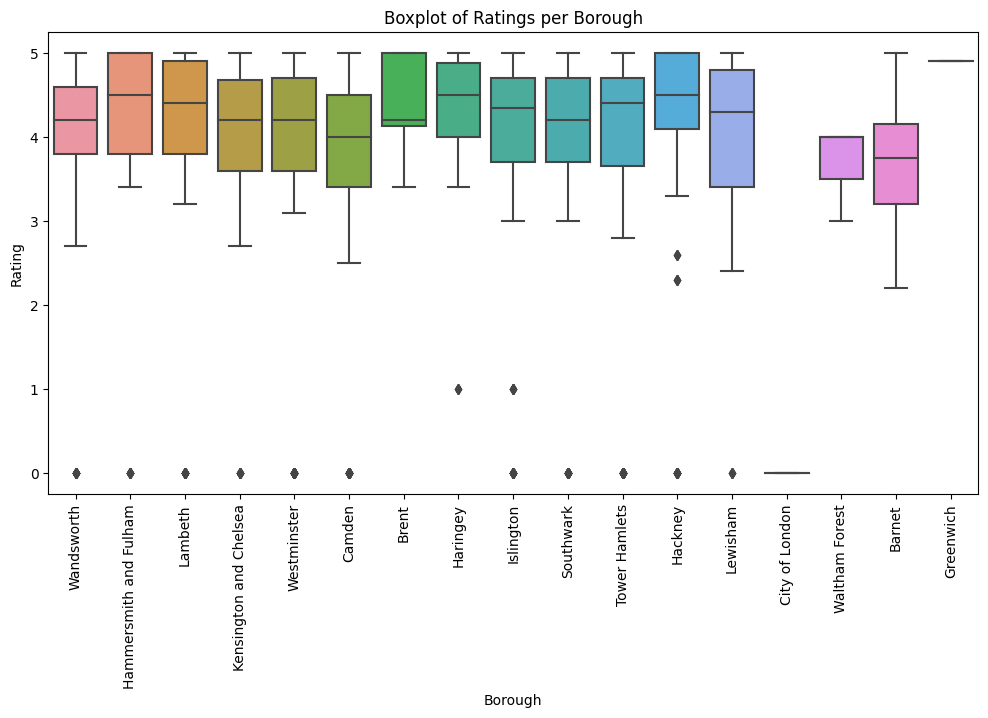

In [17]:
# Boxplot of ratings per borough
plt.figure(figsize=(12, 6))
sns.boxplot(data=vintage_shops, x='borough', y='rating')
plt.title('Boxplot of Ratings per Borough')
plt.xlabel('Borough')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


In [18]:
missing_values = vintage_shops.isnull().sum()
print(missing_values)


name             0
address          0
latitude         0
longitude        0
rating           0
borough          2
shop_id          0
Unnamed: 0       2
Code             2
Area             2
Value            2
Code_earnings    2
Area_earnings    2
Pay_2021         2
dtype: int64


In [23]:
# create Boolean mask of missing values
missing_mask = vintage_shops.isnull().any(axis=1)

# index the DataFrame using the missing_mask
vintage_shops_missing = vintage_shops[missing_mask]

display(vintage_shops_missing)

# to save time on investigation since there are only 2 shops - just remove them

,name,address,latitude,longitude,rating,borough,shop_id,Unnamed: 0,Code,Area,Value,Code_earnings,Area_earnings,Pay_2021
26,Silk & Sawdust,"2 Michael Rd, London",51.47718,-0.186552,5.0,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Silk & Sawdust,"2 Michael Rd, London",51.47718,-0.186552,5.0,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# remove rows with missing values
vintage_shops = vintage_shops.dropna(axis=0)

In [25]:
missing_values = vintage_shops.isnull().sum()
print(missing_values)

name             0
address          0
latitude         0
longitude        0
rating           0
borough          0
shop_id          0
Unnamed: 0       0
Code             0
Area             0
Value            0
Code_earnings    0
Area_earnings    0
Pay_2021         0
dtype: int64


In [ ]:
# Where did this come from? Unnamed: 0

In [29]:
column_types = vintage_shops.dtypes
print(column_types)


name              object
address           object
rating           float64
borough           object
Code              object
Area              object
Value             object
Code_earnings     object
Area_earnings     object
Pay_2021          object
dtype: object


In [30]:
numeric_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2474 entries, 0 to 2475
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         2474 non-null   float64
 1   Code           2474 non-null   object 
 2   Area           2474 non-null   object 
 3   Value          2474 non-null   object 
 4   Code_earnings  2474 non-null   object 
 5   Area_earnings  2474 non-null   object 
 6   Pay_2021       2474 non-null   object 
dtypes: float64(1), object(6)
memory usage: 154.6+ KB


In [32]:
import pandas as pd

# Drop non-numeric columns
cols_to_drop = ['name', 'address', 'borough']
numeric_cols = [col for col in vintage_shops.columns if col not in cols_to_drop]
numeric_data = vintage_shops[numeric_cols]

# Convert columns to numeric type
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
print(corr_matrix)


                rating  Code  Area  Value  Code_earnings  Area_earnings   
rating         1.00000   NaN   NaN    NaN            NaN            NaN  \
Code               NaN   NaN   NaN    NaN            NaN            NaN   
Area               NaN   NaN   NaN    NaN            NaN            NaN   
Value              NaN   NaN   NaN    NaN            NaN            NaN   
Code_earnings      NaN   NaN   NaN    NaN            NaN            NaN   
Area_earnings      NaN   NaN   NaN    NaN            NaN            NaN   
Pay_2021      -0.06196   NaN   NaN    NaN            NaN            NaN   

               Pay_2021  
rating         -0.06196  
Code                NaN  
Area                NaN  
Value               NaN  
Code_earnings       NaN  
Area_earnings       NaN  
Pay_2021        1.00000  
